## Cricket Shot Classification:  
- [Medium post](https://towardsdatascience.com/can-we-generate-automatic-cricket-commentary-using-neural-networks-dbed3aeeef07)
- [OpenPose](https://github.com/CMU-Perceptual-Computing-Lab/openpose) is used to extract 18 key point on human body for each image.
- Random Forest Classifier is trained on these key points after some feature engineering. (default hyperparameters)

<b> Results Visualized in the End of notebook.</b>

In [1]:
import argparse
import logging
import sys
import time

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pylab
import seaborn as sns

## Loading OpenPose Model

In [3]:
size = '432x368'
model = 'mobilenet_thin'

In [4]:
w, h = model_wh(size)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2019-05-20 15:37:51,861] [TfPoseEstimator] [INFO] loading graph from /home/urwa/Documents/PoseProject/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


## Loading Shot Images

In [28]:
import os
import pandas as pd

In [29]:
cutDir = '/home/urwa/Documents/Projects/cricket shot/cut/'
cutimages = os.listdir(cutDir)

In [30]:
cutShots = []
cutFiles=[]
for img in cutimages:
    image = common.read_imgfile(cutDir+img, None, None)
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        cutShots.append(humans[0])
        cutFiles.append(image)
print("Cut Shot Examples: ",len(cutFiles))

Cut Shot Examples:  40


In [31]:
sweepDir = '/home/urwa/Documents/Projects/cricket shot/sweep/'
sweepimages = os.listdir(sweepDir)

In [32]:
sweepShots = []
sweepFiles = []
for img in sweepimages:
    image = common.read_imgfile(sweepDir+img, None, None)
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        sweepShots.append(humans[0])
        sweepFiles.append(image)
print("Sweep Examples: ",len(sweepFiles))

Sweep Examples:  42


In [33]:
driveDir = '/home/urwa/Documents/Projects/cricket shot/drive/'
driveimages = os.listdir(driveDir)

In [34]:
driveShots = []
driveFiles = []
for img in driveimages:
    image = common.read_imgfile(driveDir+img, None, None)
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    if len(humans)>0:
        driveShots.append(humans[0])
        driveFiles.append(image)
print("Drive Examples: ",len(driveFiles))

Drive Examples:  33


## Extract Features

In [35]:
def humanToDict(hum):
    resultDict = {}
    parts = hum.body_parts.keys()
    for p in parts:
        resultDict[str(p)+'_x'] = hum.body_parts[p].x
        resultDict[str(p)+'_y'] = hum.body_parts[p].y
        #resultDict[str(p)+'_p'] = hum.body_parts[p].p
    return resultDict

In [36]:
cutList = []
for sh in cutShots:
    cutList.append(humanToDict(sh))
    
cutdf = pd.DataFrame(cutList)
#standHumadf['img'] = standFiles
cutdf.head()

0_x       0_y     10_x      10_y      11_x      11_y      12_x  \
0  0.523148  0.141304      NaN       NaN  0.754630  0.456522  0.777778   
1  0.550926  0.331522      NaN       NaN  0.657407  0.657609  0.620370   
2  0.657407  0.157609      NaN       NaN  0.782407  0.576087  0.736111   
3  0.611111  0.163043  0.49537  0.820652  0.666667  0.418478  0.745370   
4  0.453704  0.239130      NaN       NaN  0.416667  0.576087  0.231481   

       12_y      13_x      13_y    ...          5_x       5_y       6_x  \
0  0.717391  0.833333  0.880435    ...     0.685185  0.168478       NaN   
1  0.869565       NaN       NaN    ...     0.592593  0.369565  0.527778   
2  0.820652       NaN       NaN    ...     0.731481  0.211957  0.629630   
3  0.581522  0.740741  0.788043    ...     0.625000  0.168478  0.666667   
4  0.630435  0.273148  0.831522    ...     0.472222  0.320652  0.347222   

        6_y       7_x       7_y       8_x       8_y       9_x       9_y  
0       NaN       NaN       NaN  0.625000  0.456522  0.532407  0.652174  
1  0.505435  0.513889  0.445652  0.666667  0.657609  0.625000  0.847826  
2  0.298913  0.523148  0.353261  0.699074  0.592391  0.680556  0.771739  
3  0.206522  0.712963  0.239130  0.592593  0.423913  0.541667  0.614130  
4  0.331522       NaN       NaN  0.361111  0.548913       NaN       NaN  

[5 rows x 36 columns]

In [37]:
sweepList = []
for jh in sweepShots:
    sweepList.append(humanToDict(jh))

sweepdf = pd.DataFrame(sweepList)
sweepdf.head()

0_x       0_y      10_x      10_y      11_x      11_y      12_x  \
0  0.407407  0.250000  0.699074  0.733696  0.615741  0.434783       NaN   
1  0.328704  0.434783  0.578704  0.788043  0.495370  0.559783  0.412037   
2  0.333333  0.173913       NaN       NaN  0.560185  0.554348       NaN   
3  0.583333  0.222826       NaN       NaN  0.574074  0.586957       NaN   
4  0.657407  0.244565       NaN       NaN  0.638889  0.581522  0.731481   

       12_y      13_x     13_y    ...          5_x       5_y       6_x  \
0       NaN       NaN      NaN    ...     0.523148  0.277174  0.495370   
1  0.673913  0.416667  0.86413    ...     0.398148  0.445652  0.347222   
2       NaN       NaN      NaN    ...     0.472222  0.217391  0.574074   
3       NaN       NaN      NaN    ...     0.685185  0.282609  0.675926   
4  0.646739       NaN      NaN    ...     0.699074  0.320652  0.652778   

        6_y       7_x       7_y       8_x       8_y       9_x       9_y  
0  0.516304  0.435185  0.673913  0.652778  0.429348  0.662037  0.635870  
1  0.532609  0.282407  0.592391  0.481481  0.570652  0.486111  0.728261  
2  0.380435  0.490741  0.510870  0.472222  0.581522       NaN       NaN  
3  0.494565  0.643519  0.619565  0.421296  0.603261       NaN       NaN  
4  0.472826  0.555556  0.472826  0.569444  0.608696       NaN       NaN  

[5 rows x 36 columns]

In [38]:
driveList = []
for jh in driveShots:
    driveList.append(humanToDict(jh))

drivedf = pd.DataFrame(driveList)
drivedf.head()

0_x       0_y      10_x      10_y      11_x      11_y      12_x  \
0  0.439815  0.298913  0.453704  0.940217  0.555556  0.625000  0.578704   
1  0.472222  0.315217  0.444444  0.836957  0.449074  0.489130  0.472222   
2  0.379630  0.260870  0.263889  0.880435  0.453704  0.516304  0.509259   
3  0.546296  0.260870  0.314815  0.815217  0.430556  0.554348       NaN   
4  0.467593  0.244565  0.296296  0.788043  0.486111  0.559783  0.615741   

       12_y      13_x      13_y    ...          5_x       5_y       6_x  \
0  0.809783  0.606481  0.891304    ...     0.518519  0.375000  0.398148   
1  0.630435  0.462963  0.836957    ...     0.500000  0.375000  0.462963   
2  0.706522  0.486111  0.891304    ...     0.412037  0.288043  0.472222   
3       NaN       NaN       NaN    ...     0.523148  0.309783       NaN   
4  0.663043  0.662037  0.891304    ...     0.444444  0.309783  0.560185   

        6_y       7_x       7_y       8_x       8_y       9_x       9_y  
0  0.396739  0.356481  0.288043  0.486111  0.608696  0.375000  0.733696  
1  0.434783  0.444444  0.375000  0.407407  0.472826  0.412037  0.630435  
2  0.298913       NaN       NaN  0.388889  0.527174  0.342593  0.695652  
3       NaN       NaN       NaN  0.384259  0.548913  0.361111  0.679348  
4  0.255435  0.569444  0.163043  0.421296  0.581522  0.356481  0.771739  

[5 rows x 36 columns]

In [39]:
sweepdf.shape, cutdf.shape, drivedf.shape,

((42, 36), (40, 36), (33, 36))

In [40]:
#jumpHumadf.isna().sum()

## Join positive and negative examples into one DataFrame

In [41]:
sweepdf['pose']=0
cutdf['pose']=1
drivedf['pose']=2

alldata = sweepdf.append(cutdf)
alldata = alldata.append(drivedf)

alldata = alldata.reset_index(drop = True)
alldata.shape

(115, 37)

In [42]:
allFiles = sweepFiles + cutFiles + driveFiles
allShots = sweepShots + cutShots + driveShots

## Min Max Normalize

In [43]:
def min_max_normalize(df):
    xcols = [c for c in df.columns if 'x' in c]
    xdf = df[xcols]
    xdf = xdf.subtract(xdf.min(axis=1), axis=0)
    xdf = xdf.divide(xdf.max(axis=1), axis=0)
    
    ycols = [c for c in df.columns if 'y' in c]
    ydf = df[ycols]
    ydf = ydf.subtract(ydf.min(axis=1), axis=0)
    ydf = ydf.divide(ydf.max(axis=1), axis=0)
    if 'pose' in df.columns:
        resultdf =  pd.concat( [xdf,ydf, df[['pose']]], axis=1 )
    else:
        resultdf =  pd.concat( [xdf,ydf], axis=1 )
    return resultdf

In [44]:
alldata = min_max_normalize(alldata)
#alldata

### Model

In [45]:
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
alldata.head(2)

0_x  10_x      11_x      12_x      13_x      14_x      15_x  16_x  \
0  0.112676   1.0  0.746479       NaN       NaN  0.084507  0.154930   NaN   
1  0.169231   1.0  0.723077  0.446154  0.461538  0.138462  0.184615   NaN   

       17_x       1_x  ...        1_y       2_y       3_y       4_y       5_y  \
0  0.281690  0.323944  ...   0.164948  0.247423  0.639175  0.917526  0.134021   
1  0.292308  0.323077  ...   0.083333  0.130952  0.273810  0.416667  0.083333   

        6_y       7_y       8_y       9_y  pose  
0  0.587629  0.886598  0.422680  0.814433     0  
1  0.273810  0.404762  0.357143  0.702381     0  

[2 rows x 37 columns]

In [47]:
treatData = alldata.copy()

## Replacing missing with sentinel value

In [48]:
treatData = treatData.fillna(-1)

## Training a Random Forest and Predicting for Test Set (split: 70/30)

In [72]:
X = treatData[[c for c in treatData.columns if c != 'pose']]
X['img'] = allFiles
X['human'] = allShots
Y = treatData['pose']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019, shuffle=True)
#X_train, X_test, y_train, y_test = (X,X,Y,Y)

testImg = X_test.img
testHuman = X_test.human
X_train = np.array(X_train[[c for c in X_train.columns if c not in ['img','human'] ]]) 
X_test = np.array(X_test[[c for c in X_test.columns if c not in ['img','human'] ]]) 

print(X_train.shape)

clf = rfc(max_depth=5, n_estimators=10, random_state=2019)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

(80, 36)
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.75      0.55      0.63        11
           2       0.78      0.78      0.78         9

   micro avg       0.77      0.77      0.77        35
   macro avg       0.77      0.75      0.75        35
weighted avg       0.77      0.77      0.76        35



## Displaying Test Set Images with Prediction for Visual Validation

/home/urwa/miniconda3/envs/pose/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


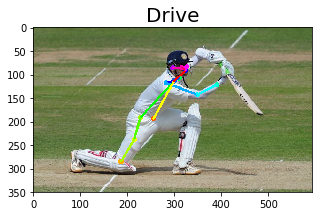

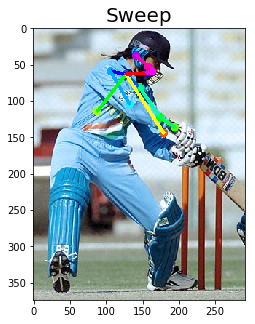

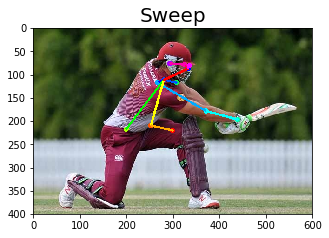

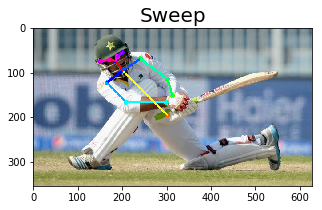

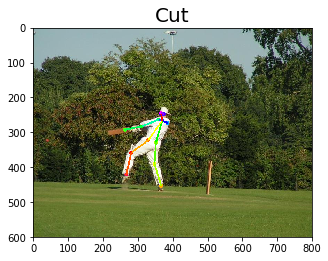

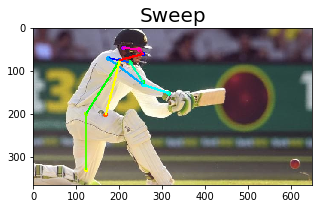

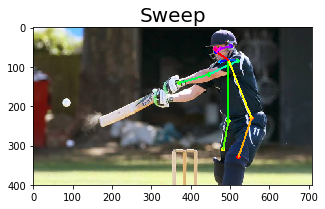

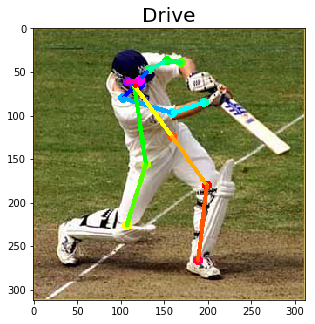

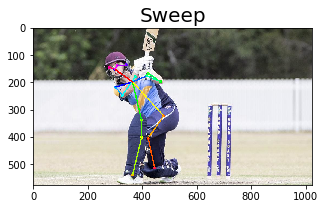

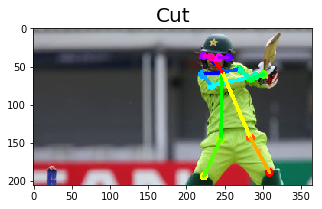

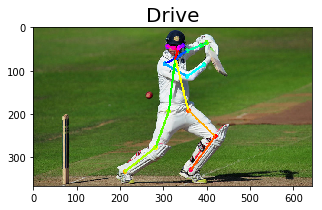

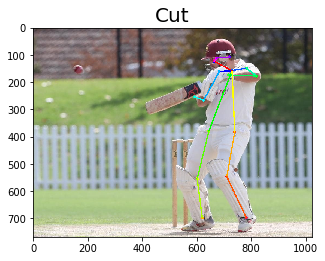

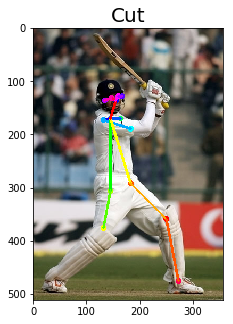

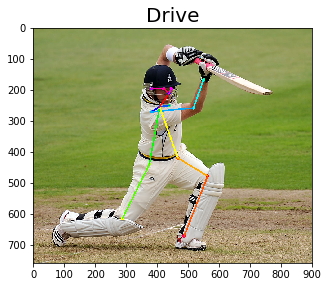

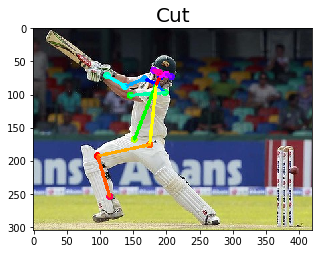

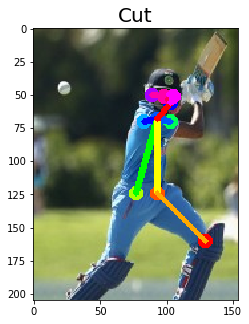

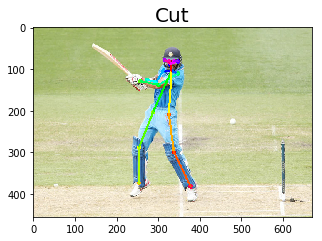

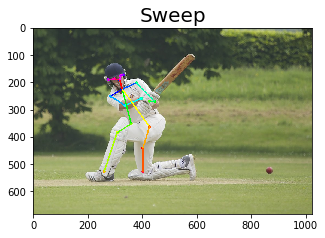

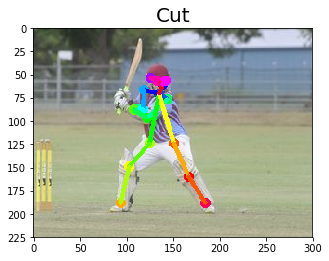

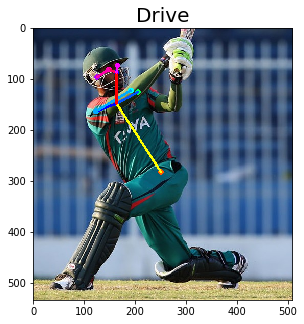

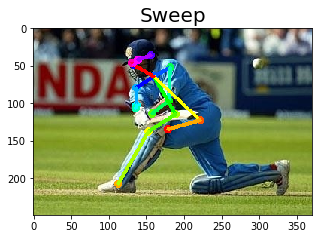

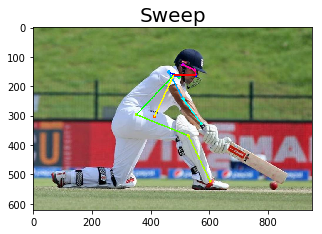

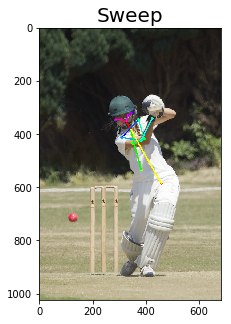

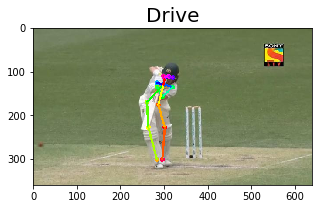

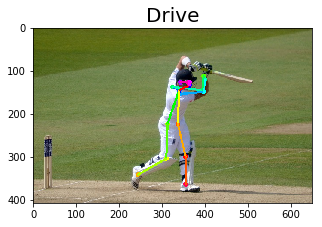

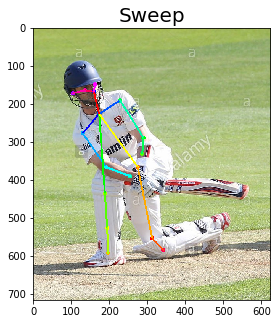

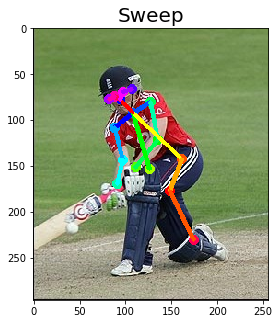

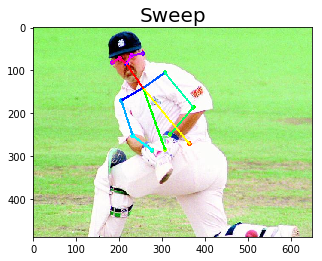

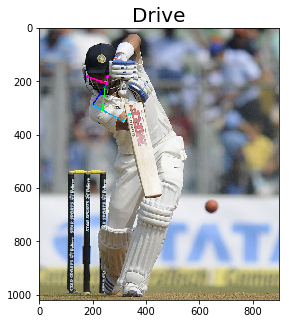

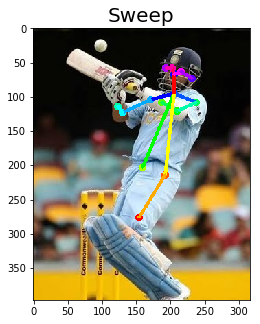

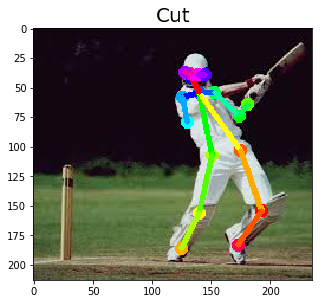

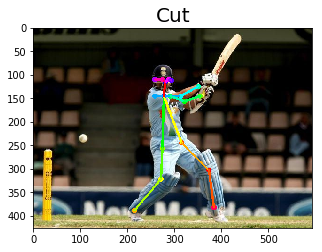

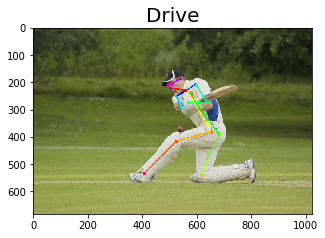

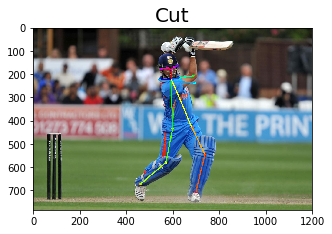

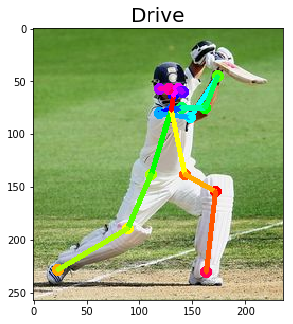

In [52]:
for p,img,hum in zip(y_pred,testImg,testHuman):
    fig = plt.figure(figsize = (5,5))
    a = fig.add_subplot(1, 1, 1)
    
    if(p==0):
        t='Sweep'
    elif(p==1):
        t='Cut'
    else:
        t='Drive'
    a.set_title(t,fontsize=20)
    resultImage = TfPoseEstimator.draw_humans(img, [hum], imgcopy=False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))